# Evaluated Machine Learning Regression Model for Beginners

### Importing the basic Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


#### Data Importing as train and test

In [2]:
train = pd.read_csv("/kaggle/input/bigmart-sales-data/Train.csv")
test = pd.read_csv("/kaggle/input/bigmart-sales-data/Test.csv")

In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


**To do examine the Data, we need to concatanate**

In [5]:
data = pd.concat([train,test],sort=False)

In [6]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
data.info() #There are missing values and we need to fill or drop them 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


*Item Outlet Sales will be our label for regression algorithm*

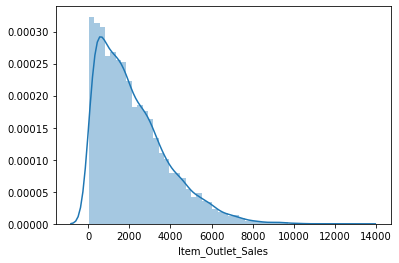

In [8]:
sns.distplot(data["Item_Outlet_Sales"])
plt.show()

Now, let's check categorical and numerical values

In [9]:
#Train
categorical = train.select_dtypes(include = [np.object])
print(categorical.shape)
numerical = train.select_dtypes(include = [np.float64,np.int64,np.int32])
print(numerical.shape)

(8523, 7)
(8523, 5)


In [10]:
#Test
categorical = test.select_dtypes(include = [np.object])
print(categorical.shape)
numerical = test.select_dtypes(include = [np.float64,np.int64,np.int32])
print(numerical.shape)

(5681, 7)
(5681, 4)


### **DATA CLEANING**
* *Missing Values*
* *Outlier Detection*
* *Feature Scaling - Standardization, - Normalization*

In [11]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- In the "Item_Weight" label exist 1463 missing value
- In the "Outlet_Size" label exist 2410 missing value
- Let's fix them

In [12]:
test.isna().sum() #Similar missing values exit in test data too.

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
train["Item_Weight"] = train["Item_Weight"].fillna(train["Item_Weight"].mean())
test["Item_Weight"] = test["Item_Weight"].fillna(test["Item_Weight"].mean())

In [14]:
train["Item_Weight"].isna().sum() , test["Item_Weight"].isna().sum()

(0, 0)

We fill missing values in the "Item_Weight" column by using "median"

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


As we see,
- Item_Weight column is float (numerical) format that's why we could use median method.
- Outlet_Size column is object form. So we need to use different method to fill them

In [16]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
test.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

For categorical nan values we can use "mode" method it means filling with most common value

In [18]:
train["Outlet_Size"] = train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])
test["Outlet_Size"] = train["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0])

In [19]:
print("Missing value quantity of train data:",train["Outlet_Size"].isna().sum())
print("Missing value quantity of test data:",test["Outlet_Size"].isna().sum())


Missing value quantity of train data: 0
Missing value quantity of test data: 0


*We fixed the whole nan values*

### Exploratory Data Analysis (EDA) 

In [20]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [22]:
train["Item_Identifier"].value_counts() #We can not detect any irregularity for that column
#try the others and checking irregularities

FDW13    10
FDG33    10
DRE49     9
DRN47     9
NCQ06     9
         ..
FDT35     1
FDQ60     1
FDK57     1
FDY43     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [23]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- There are Low Fat, low fat also, LF lets merge them
- There are reg also Regular too, we need to merge them too.


In [24]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True) 
#By doing this we merged them as one feature

In [25]:
train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [27]:
train["Outlet_Identifier"].value_counts() #There is nothing anormal

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [28]:
train["Item_Type"].value_counts() #Nothing anormal too

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [29]:
train["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [30]:
train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [31]:
train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

- Now, I wanna add a column which shows us how many years passed the item reported on the system 
- (Note: The time that ı wrote this notebook is 2021)


In [32]:
train["Duration"] = train["Outlet_Establishment_Year"].apply(lambda i:2021 - i)
test["Duration"] = test["Outlet_Establishment_Year"].apply(lambda i:2021 - i)
train["Duration"]= train["Duration"].astype("str")
test["Duration"]= test["Duration"].astype("str")

In [33]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Duration
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,12
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,34
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,36
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,19
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,14


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Duration                   8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

### Visualizations to see quantities of the values - Unvariate Data Analysis
- We just do for the object columns to see how many of them exist

But firstly how many object format column worth to visualize


In [35]:
#for i in train.columns:
#    if train.columns[i].astype == 'O':
#        print("For {} column unique value amount is : {}".format(train.columns[i],train.columns[i].unique()))
#    else:
#        break

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Duration                   8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

In [37]:
print("For Item_Identifier:",train["Item_Identifier"].unique())
print("For Item_Fat_Content:",train["Item_Fat_Content"].unique())
print("For Item_Type:",train["Item_Type"].unique())
print("For Outlet_Identifier:",train["Outlet_Identifier"].unique())
print("For Outlet_Size :",train["Outlet_Size"].unique())
print("For Outlet_Location_Type:",train["Outlet_Location_Type"].unique())
print("For Outlet_Type:",train["Outlet_Type"].unique())
print("For Duration:",train["Duration"].unique())

For Item_Identifier: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
For Item_Fat_Content: ['Low Fat' 'Regular']
For Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
For Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
For Outlet_Size : ['Medium' 'High' 'Small']
For Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
For Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
For Duration: ['22' '12' '23' '34' '36' '19' '14' '24' '17']


**what makes sense to visualize which columns have few variables**
- Item_Fat_Content
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type
- Duration

- It means that except Item_Identifer and Item_Type columns, visualization process might help to analyze the data

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seaf

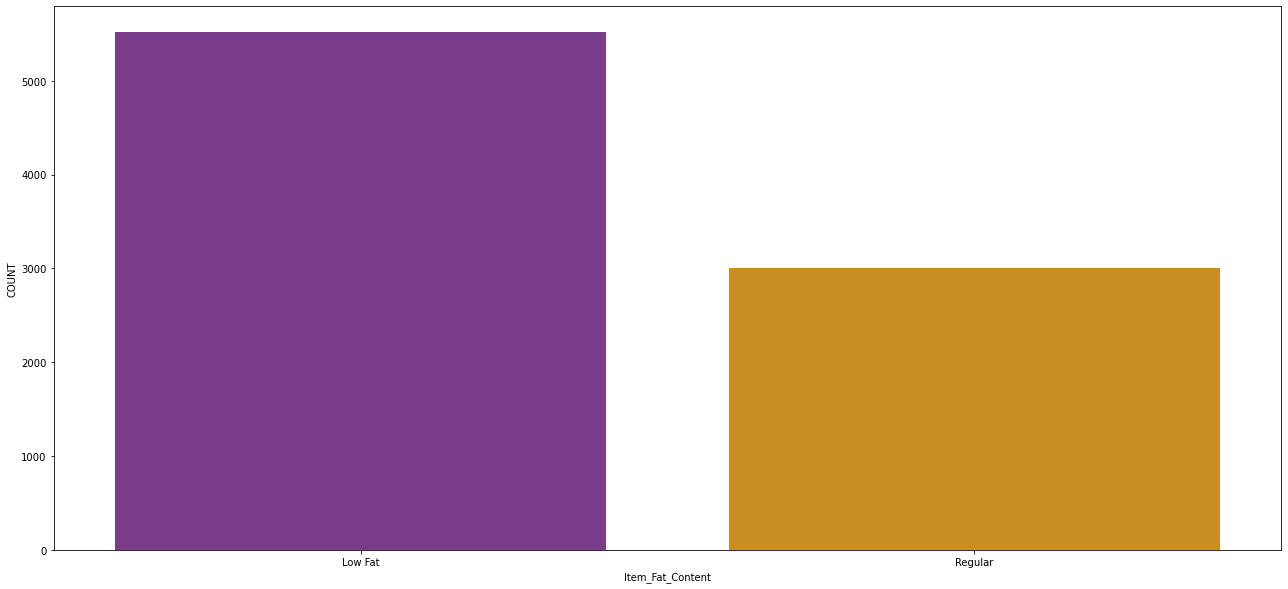

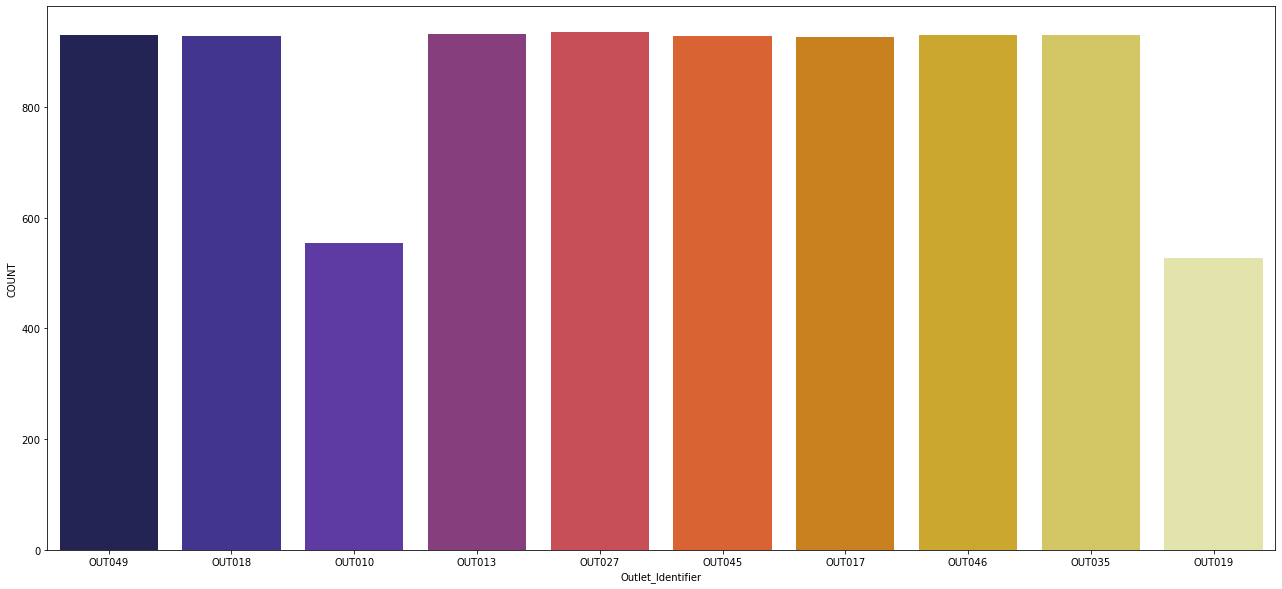

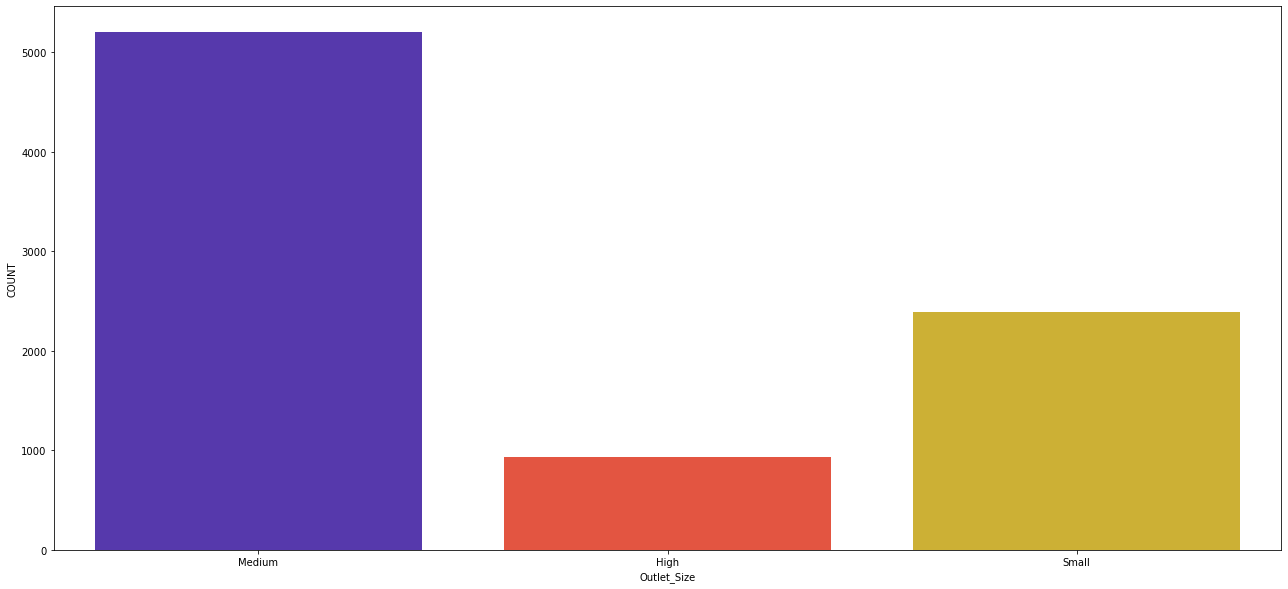

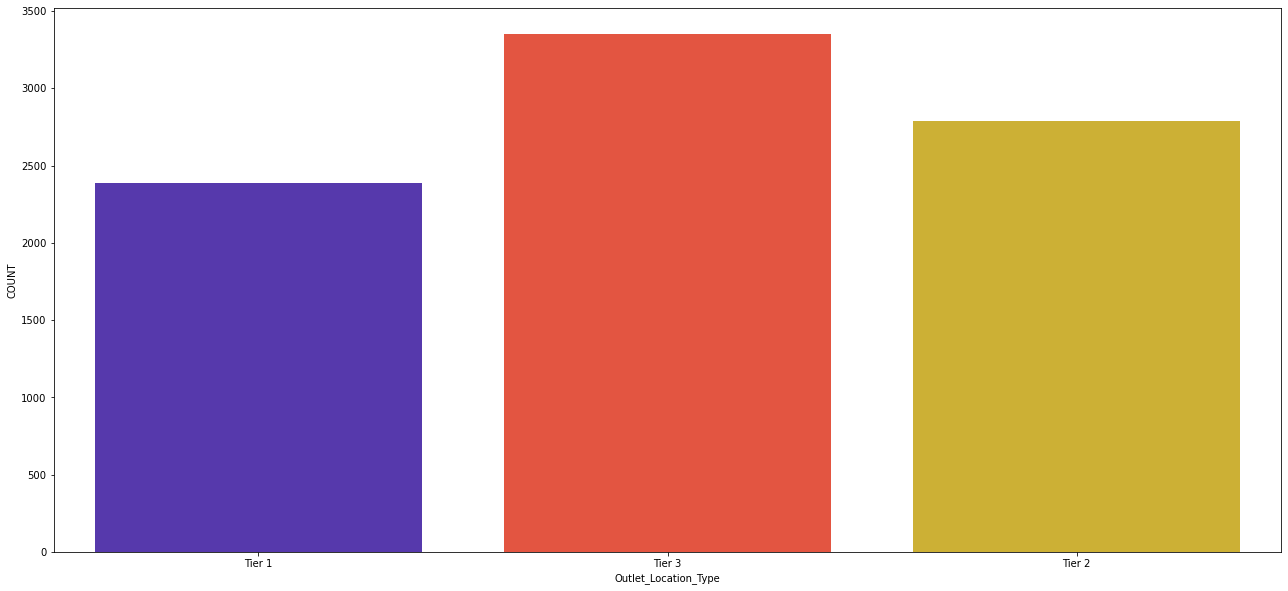

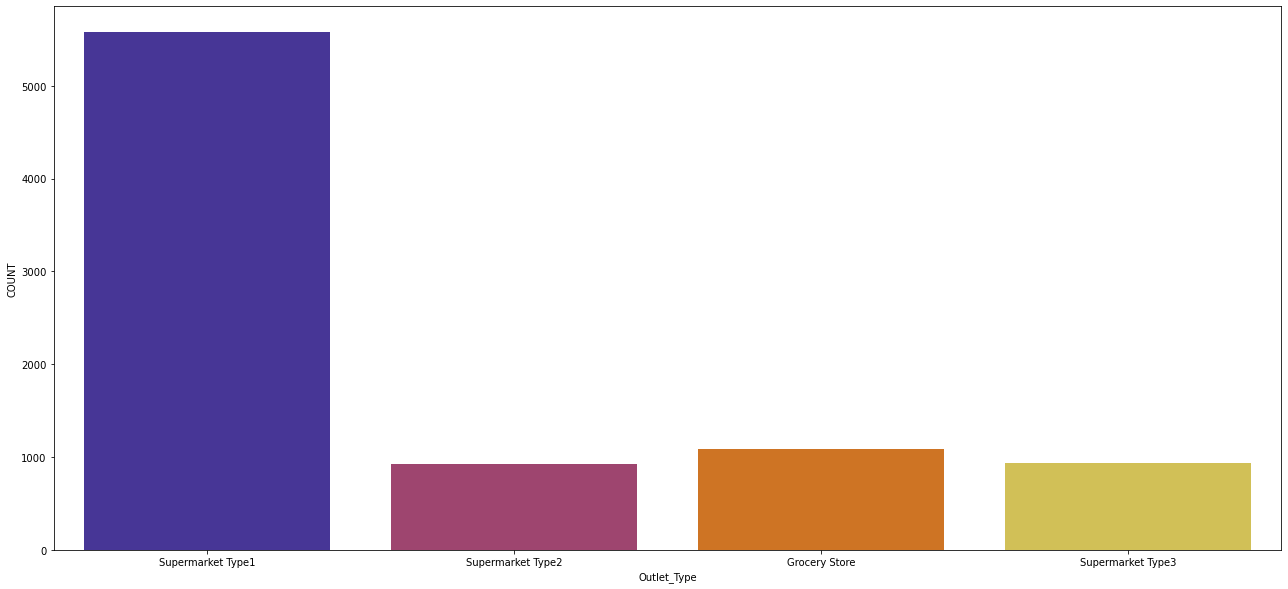

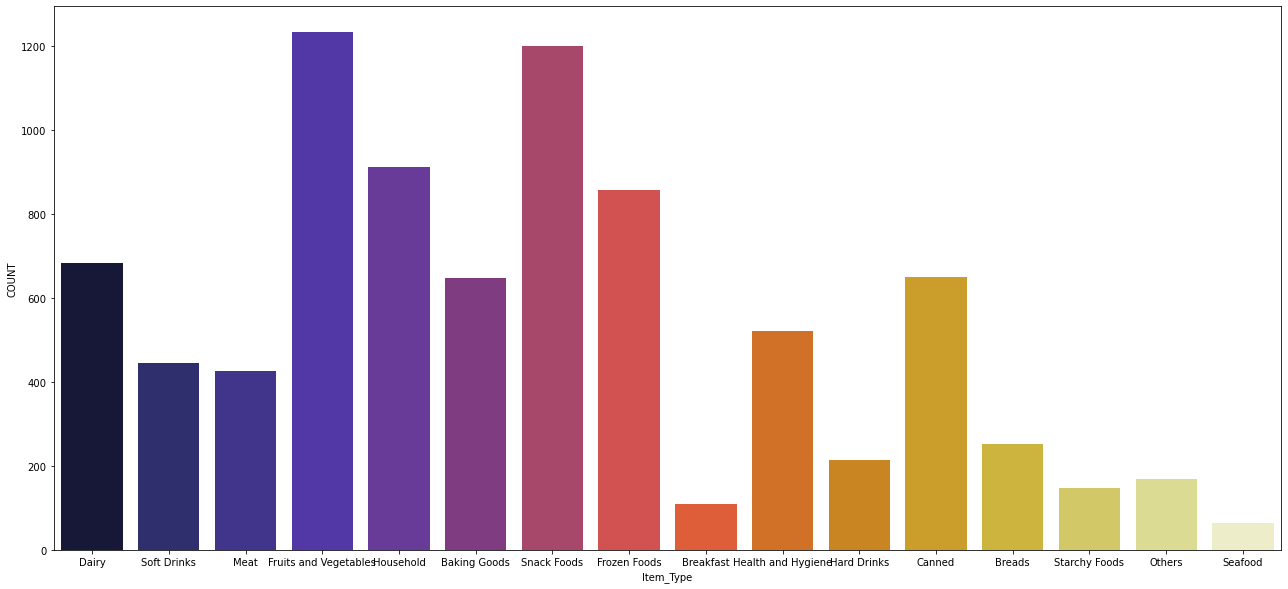

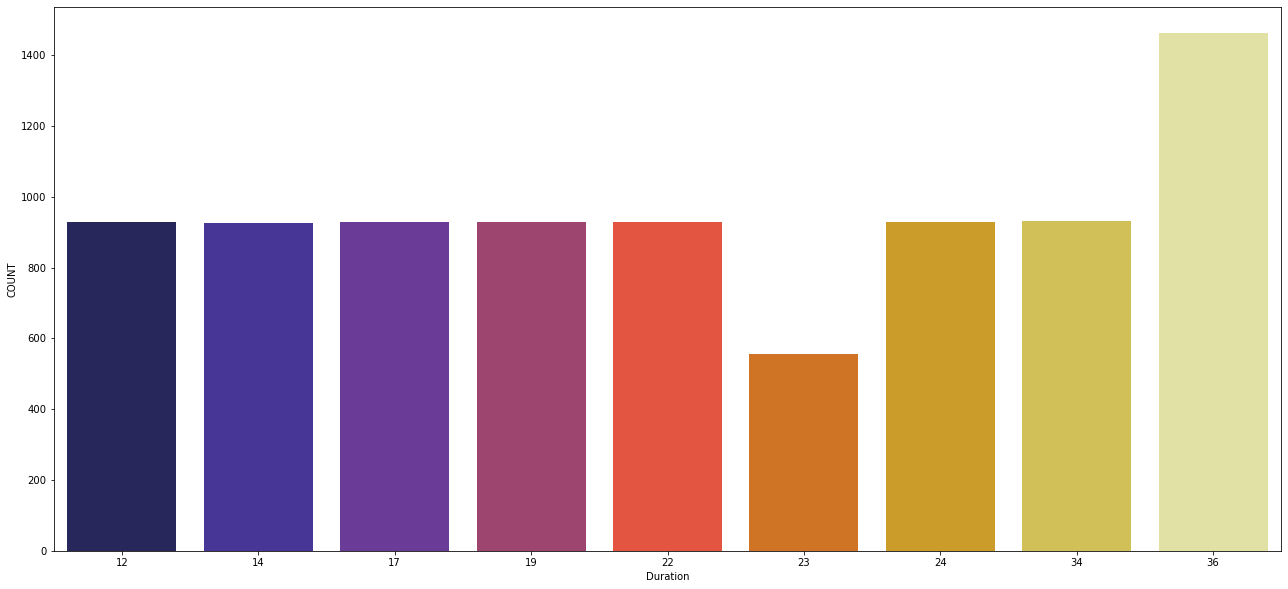

In [38]:
cols = train[["Item_Fat_Content","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type","Duration"]]
for i in cols:
    plt.figure(figsize=(22,10))
    ax = sns.countplot(cols[i],palette = "CMRmap")
    print(cols[i].value_counts())
    ax.set(ylabel = "COUNT") 

#### INFERENCES From the Unvariate Visualizations
- Low Fat people recorded as a costumer more than the Regular ones, 
- The medium size Outlets are more than the others
- Tier 3 Outlets has the majority in the cities
- As a outlet type Type 1 Supermarkets widely positioned than the others 
- The best stocked item types are Fruits, Vegetables and Snacks
- And lastly, most of the outlets have established and stil working for 35 years

#### Outlier Detection

In [39]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [40]:
train.loc[detect_outliers(train,["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year",
                                    "Item_Outlet_Sales"])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Duration


In [41]:
test.loc[detect_outliers(test,["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year"])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Duration


- We checked the outlier value but as you see there is nothing
- Reminder : We just detect outliers in datas which types are int,float or any numerical type

### Visualizations to see sales amount relations with variables- Bivariate Data Analysis
- We just do for the object columns to see how many of them affect the sales

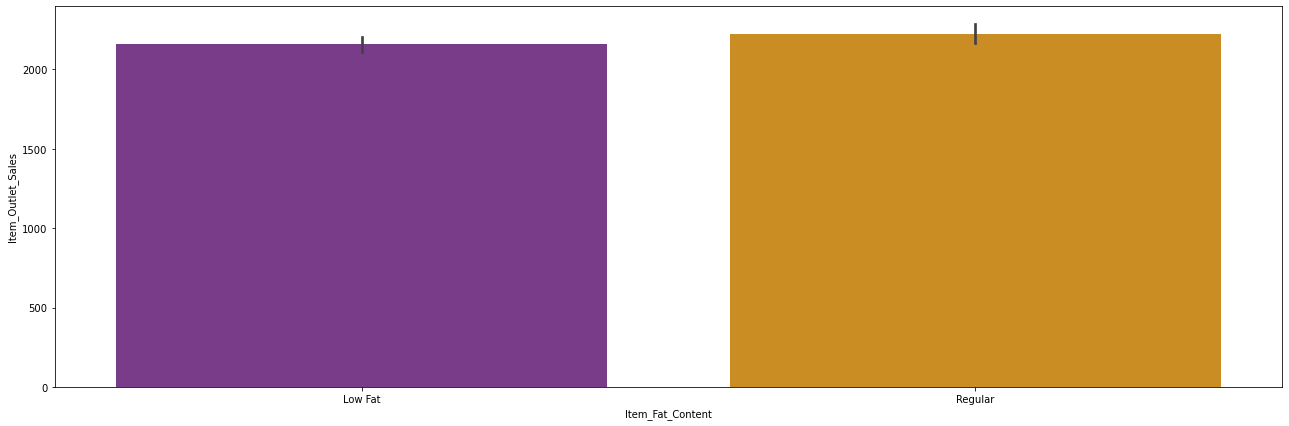

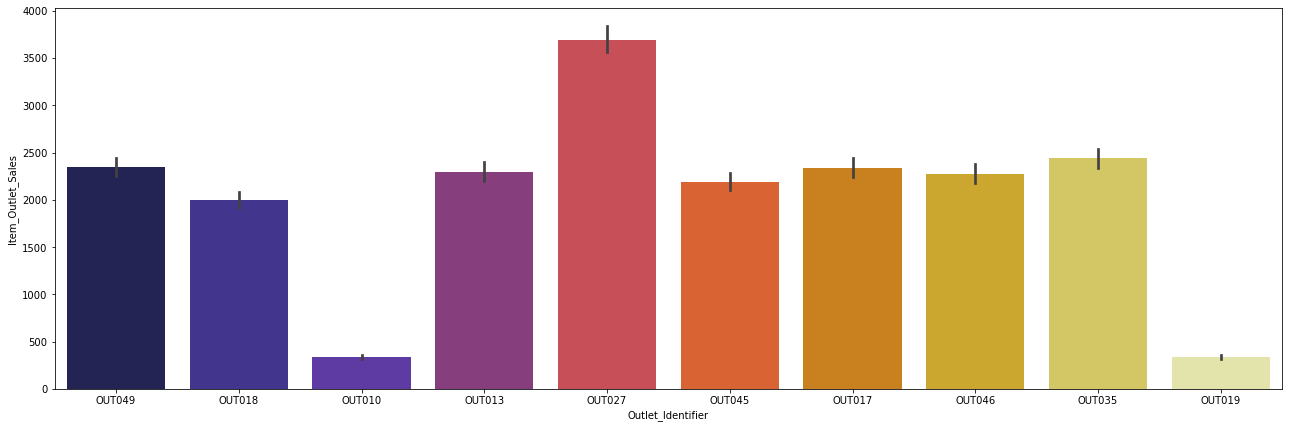

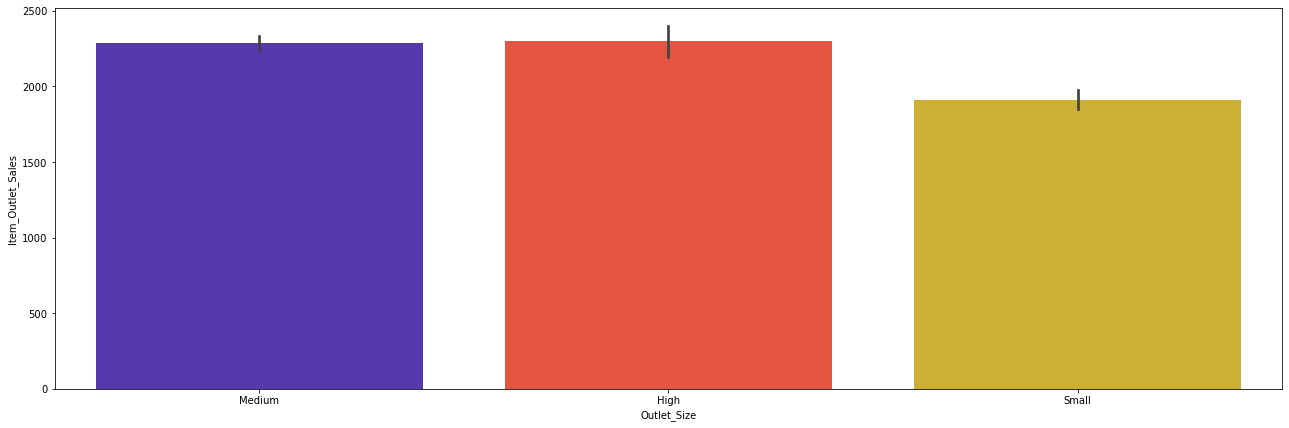

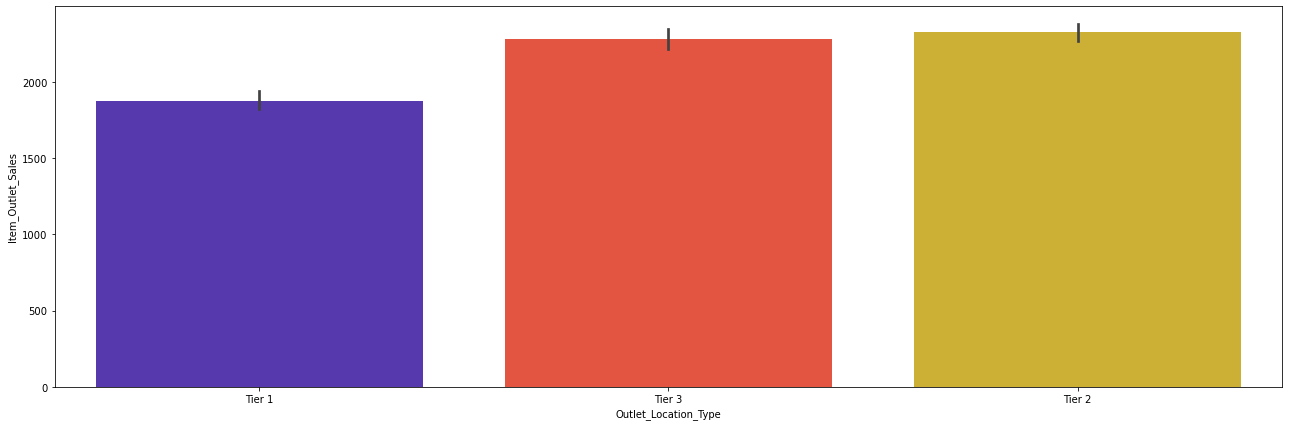

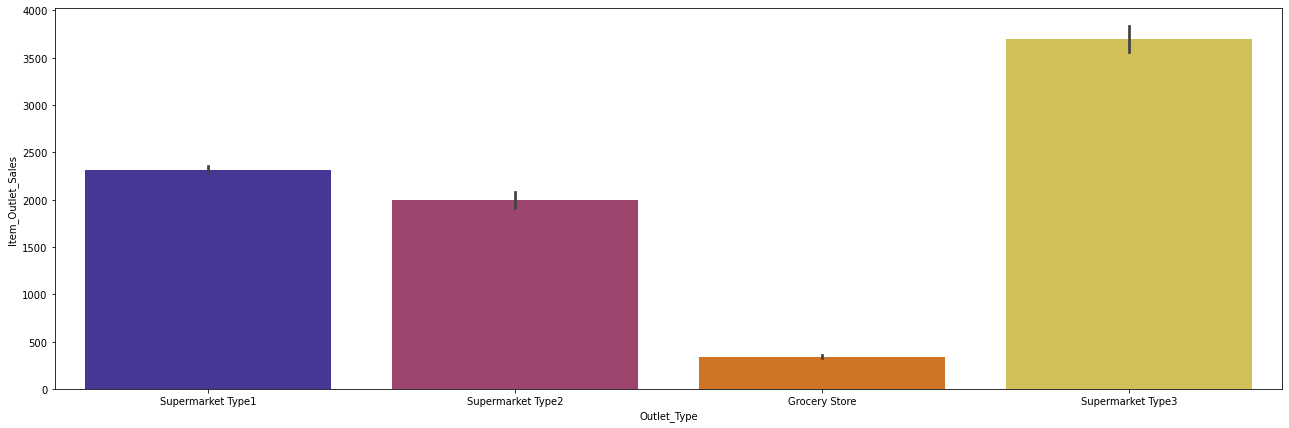

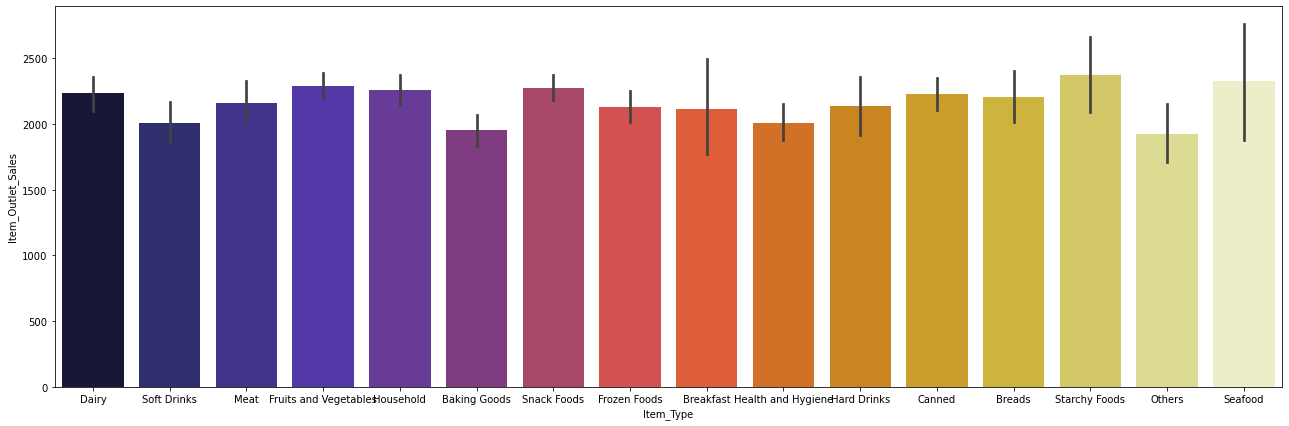

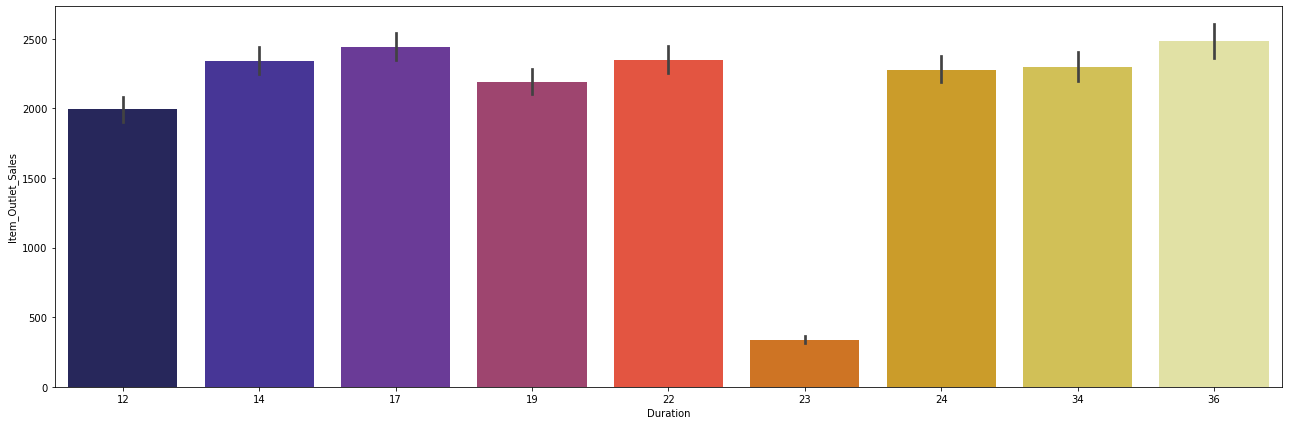

In [42]:
cols = train[["Item_Fat_Content","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type","Duration"]]
for i in cols:
    plt.figure(figsize=(22,7))
    ax = sns.barplot(cols[i],data["Item_Outlet_Sales"],palette = "CMRmap") 

#### INFERENCES From the Bivariate Visualizations
- Low Fat people have reported more than the Regular one but as we see when we investigate the sales, regular ones bought items more than low fat ones , 
- The medium size Outlets are more than the others but about sales, In the High Outlets sales numbers are better
- Tier 3 Outlets has the majority in the cities, but best sales numbers recorded in Tier 2 Outlets 
- As a outlet type Type 1 Supermarkets widely positioned than the others but about sales Tier 3 Supermarkets have the best result
- The most stocked item types are Fruits, Vegetables and Snacks but best seller is Starchy Foods
- And lastly, most of the outlets have established and stil working for 35 years also they are the best about sales

### Visualizations to see sales amount relations with multivariables- Multivariate Data Analysis
- We just do for the object columns (multivariate relationship) to see how many of them affect the sales

#### Firstly, investigating the correlation might help us

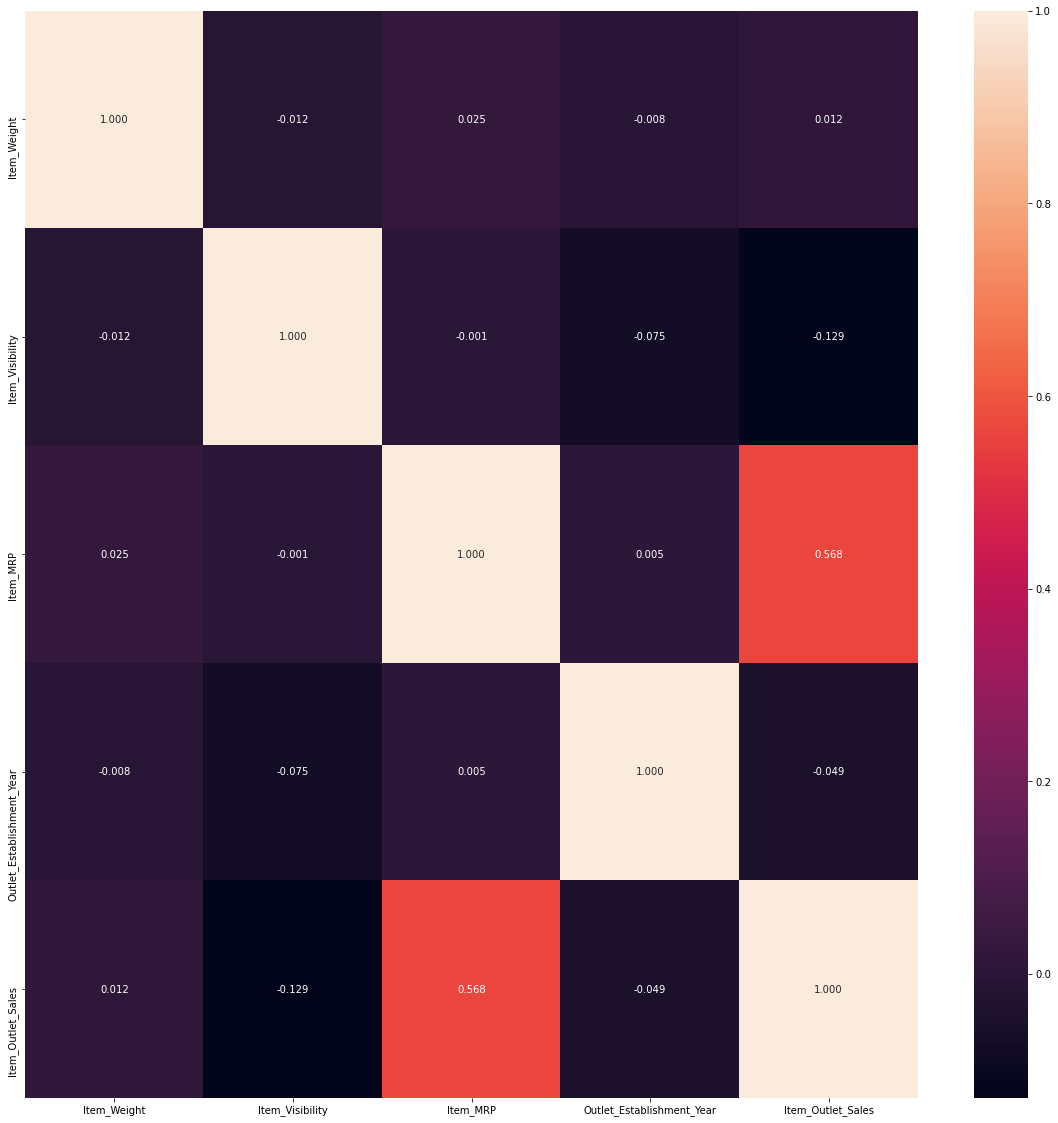

In [43]:
#Correlation
plt.figure(figsize = (20,20))
sns.heatmap(train.corr(), annot=True, fmt = ".3f")
plt.show()

- Item_MRP and Item_Weight is highly correlated one of them need to drop
- Item_MRP and Sales is so highly correlated
- Item_Weight and Sales correlated too 

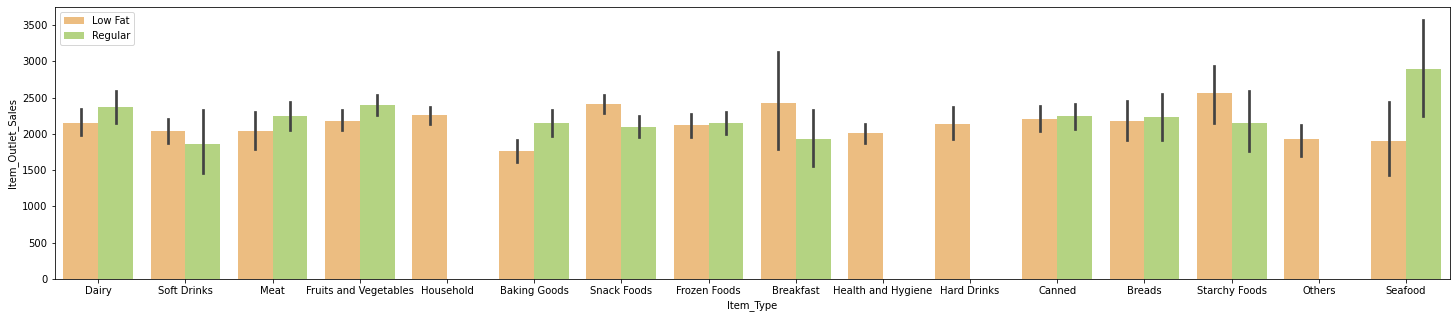

In [44]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='RdYlGn')
plt.legend()

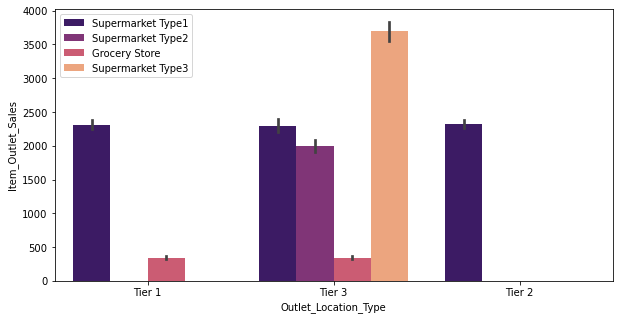

In [45]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

### Feature Engineering
- Label Encoding
- Dropping useless columns
- Splitting label and train,test
- Feature Scaling

1) ***Label Encoding***
- In Machine Learning classifiers have to be numerical format that's why we do label encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
colslabeled = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
for i in colslabeled:
    train[i] = le.fit_transform(train[i])
    
for i in colslabeled:
    test[i] = le.fit_transform(test[i])
    
xc = train[colslabeled]

In [47]:
for  i in xc:
    print("For {} column, Number of unique values :{}".format(xc[i].name,xc[i].nunique()))

For Item_Fat_Content column, Number of unique values :2
For Outlet_Location_Type column, Number of unique values :3
For Outlet_Size column, Number of unique values :3
For Outlet_Type column, Number of unique values :4
For Item_Type column, Number of unique values :16


In [48]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Duration
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,22
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,12
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,22
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,23
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,34


2) *Dropping Columns*
- "Item_Identifier",
- "Outlet_Identifier",
- "Outlet_Establishment_Year" is not useful for our model that's why we need to drop them

In [49]:
train.drop(["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],axis=1, inplace =True)
test.drop(["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],axis=1, inplace =True)

3) *Splitting Train Test Split and Label*
- We'll use our test set as a validation set, so firstly;
- We need to seperate our label ,"Item_Outlet_Sales", 
- Then we need to do train-test split

In [50]:
y=train["Item_Outlet_Sales"]
X=train.drop(["Item_Outlet_Sales"],axis=1)

In [51]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Duration
0,9.30,0,0.016047,4,249.8092,1,0,1,22
1,5.92,1,0.019278,14,48.2692,1,2,2,12
2,17.50,0,0.016760,10,141.6180,1,0,1,22
3,19.20,1,0.000000,6,182.0950,1,2,0,23
4,8.93,0,0.000000,9,53.8614,0,2,1,34


4) *Feature Scaling*

In [52]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Duration'],
      dtype='object')

In [53]:
features =[]
for i in X.columns:
    features.append([i])
#The columns have added to features list

In [54]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [55]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Duration
549,9.500,1,0.035206,6,171.3448,1,0,1,22
7757,18.000,0,0.047473,9,170.5422,1,1,1,19
764,17.600,1,0.076122,10,111.7202,2,0,1,24
6867,8.325,0,0.029845,6,41.6138,1,1,1,19
2716,12.850,0,0.137228,13,155.5630,2,0,1,24


In [56]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)
# #After the process, our data turns into numpy array

## Building Regression Models
- Linear Regression
- Random Forest Regressor

### Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression(normalize=True)
Lr.fit(X_train,y_train)
y_pred = Lr.predict(X_test)

*- Evaluation Metrics*
- R2
+ Adjusted R2
+ Accuracy Score
+ Mean Absolute Error
+ Mean Squared Error

In [58]:
#R2 Score
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.5241348086667035


In [59]:
#Adjusted R2 Score
def adj_r2 (X,y,model):
    r_squared = model.score(X,y)
    return(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1))

#Checking Adjusted R2 score of the train and test datas 
print("Adj. R2 of the train set",adj_r2(X_train,y_train,Lr))
print("Adj. R2 of the test set",adj_r2(X_test,y_test,Lr))

Adj. R2 of the train set 0.503112203319487
Adj. R2 of the test set 0.5216080908366152


In [60]:
#Accuracy Score
print("Score of the train set",Lr.score(X_train,y_train))
print("Score of the test set",Lr.score(X_test,y_test))

Score of the train set 0.5037682089187425
Score of the test set 0.5241348086667035


In [61]:
#Mean Abs. Error and Mean Squared Error
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
print("Mean Absolute Error :",MAE)
print("Mean Squared Error :",MSE)

Mean Absolute Error : 856.0338972476161
Mean Squared Error : 1293387.3457887392


*Our model is not accurate enough so let's try regularization technics*
- Lasso (L1)

In [62]:
move = np.arange(0.01,0.99,0.05)
move

array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96])

In [63]:
#Lasso (L1) Regularization 
from sklearn.linear_model import Lasso
for i in move:
    lasso_model = Lasso(alpha =i)
    lasso_model.fit(X_train,y_train)
    print("Train, For alpha = {}, model score is {} ".format(i,lasso_model.score(X_train,y_train)))

Train, For alpha = 0.01, model score is 0.503768195471456 
Train, For alpha = 0.060000000000000005, model score is 0.5037677247771106 
Train, For alpha = 0.11, model score is 0.5037665816894545 
Train, For alpha = 0.16000000000000003, model score is 0.503764766416791 
Train, For alpha = 0.21000000000000002, model score is 0.503762278323596 
Train, For alpha = 0.26, model score is 0.5037591176993201 
Train, For alpha = 0.31000000000000005, model score is 0.50375528618771 
Train, For alpha = 0.36000000000000004, model score is 0.5037507807707489 
Train, For alpha = 0.41000000000000003, model score is 0.5037456028222171 
Train, For alpha = 0.46, model score is 0.5037397523421145 
Train, For alpha = 0.51, model score is 0.5037332293304413 
Train, For alpha = 0.56, model score is 0.5037260396949099 
Train, For alpha = 0.6100000000000001, model score is 0.5037181721551787 
Train, For alpha = 0.66, model score is 0.5037096320828951 
Train, For alpha = 0.7100000000000001, model score is 0.5037

### Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(n_estimators = 300,
                           criterion = "mse", 
                           max_depth =4, 
                           n_jobs = -1,
                           random_state = 42)

In [65]:
Rf.fit(X_train,y_train)
y_predrf = Rf.predict(X_test)

*- Evaluation Metrics*
- R2
+ Adjusted R2
+ Accuracy Score
+ Mean Absolute Error
+ Mean Squared Error

In [66]:
#R2 Score
from sklearn.metrics import r2_score
R2rf = r2_score(y_test,y_predrf)
print("r2 score is :",R2rf)

r2 score is : 0.6121612766055358


In [67]:
#Adjusted R2 Score
def adj_r2 (X,y,model):
    r_squared = model.score(X,y)
    return(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1))

#Checking Adjusted R2 score of the train and test datas 
print("Adj. R2 of the train set",adj_r2(X_train,y_train,Rf))
print("Adj. R2 of the test set",adj_r2(X_test,y_test,Rf))

Adj. R2 of the train set 0.592500152462226
Adj. R2 of the test set 0.6101019559503439


In [68]:
#Mean Abs. Error and Mean Squared Error
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAErf = mean_absolute_error(y_test,y_predrf)
MSErf = mean_squared_error(y_test,y_predrf)
print("Mean Absolute Error :",MAErf)
print("Mean Squared Error :",MSErf)

Mean Absolute Error : 723.5525480396751
Mean Squared Error : 1054134.0408609963


Let's compare the Results 

In [69]:
print("Linear Regression r2 score is :",R2)
print("Random Forest r2 score is :",R2rf)
print("-----------------------------------")
print("Linear Reg. Adj. R2 of the train set",adj_r2(X_train,y_train,Lr))
print("Random Forest Adj. R2 of the train set",adj_r2(X_train,y_train,Rf))
print("Linear Reg.Adj. R2 of the test set",adj_r2(X_test,y_test,Lr))
print("Random Forest Adj. R2 of the test set",adj_r2(X_test,y_test,Rf))
print("-----------------------------------")
print("Linear Regression Mean Absolute Error :",MAE)
print("Linear Regression Mean Squared Error :",MSE)
print("Random Forest Mean Absolute Error :",MAErf)
print("Random Forest Mean Squared Error :",MSErf)

Linear Regression r2 score is : 0.5241348086667035
Random Forest r2 score is : 0.6121612766055358
-----------------------------------
Linear Reg. Adj. R2 of the train set 0.503112203319487
Random Forest Adj. R2 of the train set 0.592500152462226
Linear Reg.Adj. R2 of the test set 0.5216080908366152
Random Forest Adj. R2 of the test set 0.6101019559503439
-----------------------------------
Linear Regression Mean Absolute Error : 856.0338972476161
Linear Regression Mean Squared Error : 1293387.3457887392
Random Forest Mean Absolute Error : 723.5525480396751
Random Forest Mean Squared Error : 1054134.0408609963


### Conclsion
- **Clearly Random Forest more accurate than the Linear Regression for this problem** 
- Thanks